In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# Import Dataframe

In [4]:
dataframe = pd.read_feather('E:\Data Science\Python\project data science\IDX Partners credit_risk_rev\loan_data_2007_2014.feather')

In [5]:
dataframe.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,None,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,None,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,None,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,None,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,None,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,None,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,None,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Check dataframe rows and columns length

print('Dataframe total rows : ', dataframe.shape[0])
print('Dataframe total columns : ', dataframe.shape[1])

Dataframe total rows :  466285
Dataframe total columns :  74


- Dataframe contains 466285 rows and 74 columns

# Exploratory Data Analysis


### - Cleanning and Preprocessing

In [7]:
# Check duplicate data
print('Count duplicated row : ', dataframe.duplicated().sum())
print('Count duplicated id : ', dataframe['id'].duplicated().sum())
print('Count duplicated member id : ', dataframe['member_id'].duplicated().sum())

Count duplicated row :  0
Count duplicated id :  0
Count duplicated member id :  0


In [8]:
# Check null values, and explore more about dataframe

def explore_data(data: pd.DataFrame):

    input_columns = data.columns
    data_type = []
    total_null = []
    null_pct = []
    data_range = []
    unique_values = []

    new_df = pd.DataFrame(columns=['Data Type', 'Total Null', 'Null Pct', 'Data Range', 'Unique Values'], index=data.columns)

    for col in input_columns:
        data_type.append(data[col].dtypes)
        total_null.append(data[col].isna().sum())
        null_pct.append(round(data[col].isna().sum() / data.shape[0] * 100, 2))
        if data[col].dtype != 'object':
            data_range.append(data[col].max() - data[col].min())
            unique_values.append('-')
        else:
            data_range.append(0)
            unique_values.append(data[col].unique())
    
    new_df = {
        'Data Type': data_type,
        'Total Null': total_null,
        'Null_pct': null_pct,
        'Data Range': data_range,
        'Unique Values': unique_values
    }

    return pd.DataFrame(new_df, index=input_columns)
         


In [9]:
explore_dataframe = explore_data(dataframe)
explore_dataframe

,Data Type,Total Null,Null_pct,Data Range,Unique Values
id,int64,0,0.00,3.804338e+07,-
member_id,int64,0,0.00,4.079035e+07,-
loan_amnt,int64,0,0.00,3.450000e+04,-
funded_amnt,int64,0,0.00,3.450000e+04,-
funded_amnt_inv,float64,0,0.00,3.500000e+04,-
term,object,0,0.00,0.000000e+00,"[ 36 months, 60 months]"
int_rate,float64,0,0.00,2.064000e+01,-
installment,float64,0,0.00,1.394320e+03,-
grade,object,0,0.00,0.000000e+00,"[B, C, A, E, F, D, G]"
sub_grade,object,0,0.00,0.000000e+00,"[B2, C4, C5, C1, B5, A4, E1, F2, C3, B1, D1, A..."


- From the table above, there is still has feature/columns with more than 20% null values. Next we will remove some feature with null values more than 20%. 

In [10]:
# Store columns name with null values more than 20%

drop_col = list(explore_dataframe[explore_dataframe.Null_pct > 20].index)

print(len(drop_col))
drop_col


22


['desc',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m']

In [11]:
# Drop columns with null values

dataframe.drop(labels=drop_col, axis=1, inplace=True)

In [12]:
# Drop any other columns that are irrelevant for use in the machine learning model

dataframe.drop(labels=['id', 'member_id', 'sub_grade', 'url', 'title', 'zip_code', 'addr_state'], axis=1, inplace=True)

In [13]:
print(dataframe.shape)
dataframe.head()

(466285, 45)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,36 months,10.65,162.87,B,None,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,27.65,0.0,Jan-85,1.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
1,2500,2500,2500.0,60 months,15.27,59.83,C,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,1.00,0.0,Apr-99,5.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
2,2400,2400,2400.0,36 months,15.96,84.33,C,None,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,8.72,0.0,Nov-01,2.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
3,10000,10000,10000.0,36 months,13.49,339.31,C,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,20.00,0.0,Feb-96,1.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,Jan-15,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
4,3000,3000,3000.0,60 months,12.69,67.79,B,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,other,17.94,0.0,Jan-96,0.0,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN


- From the dataframe above there is no target label to be predicted. Therefore, we will provide some labels for credit loans that are categorized as good and bad.

In [14]:
# Define target labels

dataframe.loan_status.value_counts(normalize=True)*100

Current                                                48.087757
Fully Paid                                             39.619332
Charged Off                                             9.109236
Late (31-120 days)                                      1.479782
In Grace Period                                         0.674695
Does not meet the credit policy. Status:Fully Paid      0.426349
Late (16-30 days)                                       0.261214
Default                                                 0.178432
Does not meet the credit policy. Status:Charged Off     0.163205
Name: loan_status, dtype: float64

- From the loan status above, which is a good loan category, it is only current and paid off, which means the loan has been paid in full. 
- Meanwhile, the others are bad loan categories or commonly referred to as fraud.

In [15]:
# Create labels

good_loans = ['Current', 'Fully Paid']

dataframe.loan_status = np.where(dataframe.loan_status.isin(good_loans), 0, 1)

In [16]:
dataframe.loan_status.value_counts(normalize=True)*100

0    87.707089
1    12.292911
Name: loan_status, dtype: float64

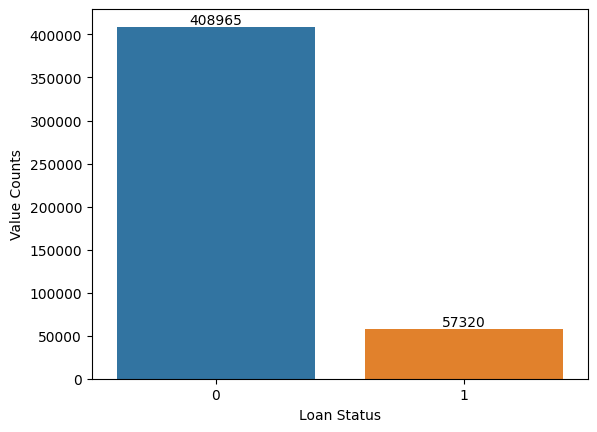

In [17]:
loan_status_count = dataframe.loan_status.value_counts().to_frame()

fig = sns.barplot(data=loan_status_count, x=loan_status_count.index, y='loan_status')

for index, row in loan_status_count.iterrows():
    fig.annotate(text=row['loan_status'], xy=(index, row['loan_status']), ha='center', va='bottom')

fig.set_xlabel('Loan Status')
fig.set_ylabel('Value Counts')

plt.show()

- There is an imbalance in target prediction, this can result in poor results in machine learning models as the machine only learns most of the data. This can be overcome by various methods such as Random Over Sampling, Smote Method, and others.

In [18]:
dataframe.select_dtypes(include='O')

,term,grade,emp_title,emp_length,home_ownership,verification_status,issue_d,pymnt_plan,purpose,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
0,36 months,B,None,10+ years,RENT,Verified,Dec-11,n,credit_card,Jan-85,f,Jan-15,Jan-16,INDIVIDUAL
1,60 months,C,Ryder,< 1 year,RENT,Source Verified,Dec-11,n,car,Apr-99,f,Apr-13,Sep-13,INDIVIDUAL
2,36 months,C,None,10+ years,RENT,Not Verified,Dec-11,n,small_business,Nov-01,f,Jun-14,Jan-16,INDIVIDUAL
3,36 months,C,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,Dec-11,n,other,Feb-96,f,Jan-15,Jan-15,INDIVIDUAL
4,60 months,B,University Medical Group,1 year,RENT,Source Verified,Dec-11,n,other,Jan-96,f,Jan-16,Jan-16,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,60 months,C,Financial Advisor,4 years,MORTGAGE,Source Verified,Jan-14,n,debt_consolidation,Apr-03,w,Jan-16,Jan-16,INDIVIDUAL
466281,60 months,D,Chief of Interpretation (Park Ranger),10+ years,MORTGAGE,Verified,Jan-14,n,debt_consolidation,Jun-97,f,Dec-14,Jan-16,INDIVIDUAL
466282,60 months,D,patrol,7 years,MORTGAGE,Verified,Jan-14,n,debt_consolidation,Dec-01,f,Jan-16,Dec-15,INDIVIDUAL
466283,36 months,A,Server Engineer Lead,3 years,OWN,Verified,Jan-14,n,credit_card,Feb-03,w,Dec-14,Apr-15,INDIVIDUAL


- Next, data cleaning will be carried out in the categorical data column

In [19]:
# Because in application_type has only one category we will remove the column and remove initial_list_status

dataframe.drop(labels=['application_type', 'initial_list_status'], axis=1, inplace=True)

In [20]:
# clean term, and convert into int data type to int

dataframe['term'] = dataframe['term'].str.replace(' months', '')
dataframe['term'] = dataframe['term'].astype(int)

In [21]:
# grade

dataframe['grade'].value_counts(normalize=True)*100


B    29.365946
C    26.870476
D    16.489486
A    16.056060
E     7.668486
F     2.837106
G     0.712440
Name: grade, dtype: float64

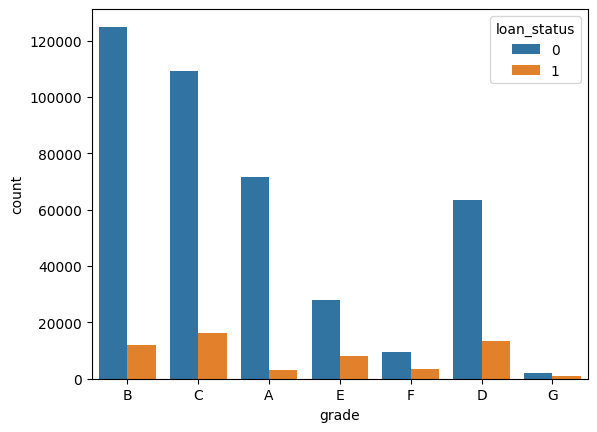

In [22]:
# count grade by loan status 

fig = sns.countplot(data=dataframe, x='grade', hue='loan_status')

plt.show()

In [23]:
# emp_title

print(dataframe.emp_title.nunique())
dataframe.emp_title.value_counts(normalize=True)*100

205475


Teacher                              1.230690
Manager                              1.011632
Registered Nurse                     0.527927
RN                                   0.502397
Supervisor                           0.448373
                                       ...   
The Eastern Arizona AHEC             0.000228
Delaware Quarries.com                0.000228
McCauley trucking and warehousing    0.000228
save mart supermarkets               0.000228
Server Engineer Lead                 0.000228
Name: emp_title, Length: 205475, dtype: float64

- There are too many categories in the title column, therefore it is better to drop the title column

In [24]:
# Drop emp_title

dataframe.drop(labels='emp_title', axis=1, inplace=True)

In [25]:
# emp_length

dataframe['emp_length'].nunique()
dataframe['emp_length'].value_counts(normalize=True)*100


10+ years    33.697900
2 years       9.291520
3 years       8.218704
< 1 year      8.144369
5 years       6.911204
1 year        6.652488
4 years       6.293386
7 years       5.879486
6 years       5.864215
8 years       5.029454
9 years       4.017275
Name: emp_length, dtype: float64

In [26]:
# clean emp_lenght and convert data type to float

dataframe['emp_length'] = dataframe['emp_length'].str.replace('\+ years', '')
dataframe['emp_length'] = dataframe['emp_length'].str.replace(' years', '')
dataframe['emp_length'] = dataframe['emp_length'].str.replace(' year', '')
dataframe['emp_length'] = dataframe['emp_length'].str.replace('< 1', str(0))

dataframe['emp_length'] = dataframe['emp_length'].astype(float)

C:\Users\09021\AppData\Local\Temp\ipykernel_4488\1017960010.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  dataframe['emp_length'] = dataframe['emp_length'].str.replace('\+ years', '')


In [27]:
# home ownership

dataframe['home_ownership'].value_counts(normalize=True)*100

MORTGAGE    50.586015
RENT        40.420129
OWN          8.943886
OTHER        0.039032
NONE         0.010723
ANY          0.000214
Name: home_ownership, dtype: float64

In [28]:
# combine NONE and ANY from home ownership into OTHER

dataframe['home_ownership'] = dataframe['home_ownership'].str.replace('NONE', 'OTHER')
dataframe['home_ownership'] = dataframe['home_ownership'].str.replace('ANY', 'OTHER')

dataframe['home_ownership'].value_counts(normalize=True)*100


MORTGAGE    50.586015
RENT        40.420129
OWN          8.943886
OTHER        0.049969
Name: home_ownership, dtype: float64

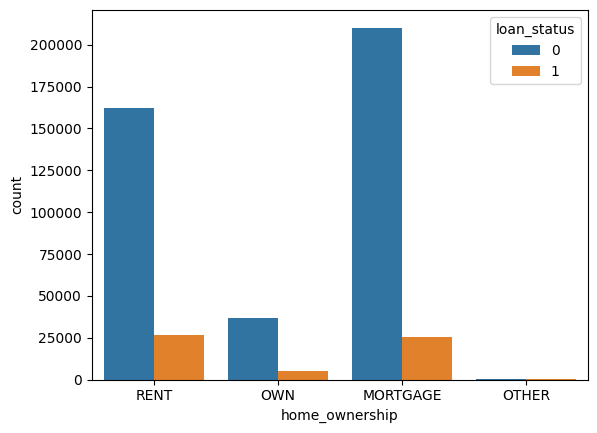

In [29]:
# count home ownership by loan status

fig = sns.countplot(data=dataframe, x='home_ownership', hue='loan_status')

plt.show()

In [30]:
# verification status

dataframe['verification_status'].value_counts(normalize=True)*100

Verified           36.041262
Source Verified    32.167666
Not Verified       31.791072
Name: verification_status, dtype: float64

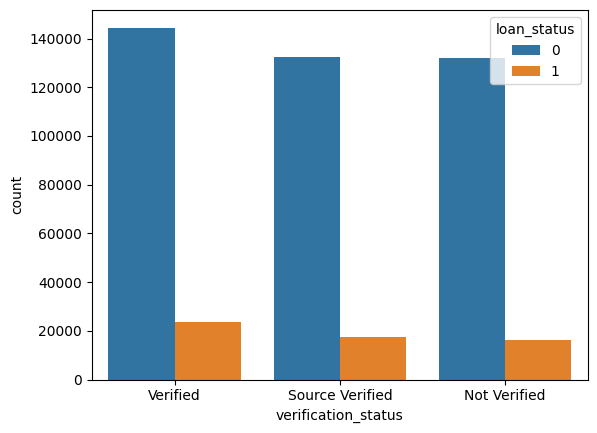

In [31]:
# count verification status by loan status

fig = sns.countplot(data=dataframe, x='verification_status', hue='loan_status')

plt.show()

In [32]:
# payment plan

dataframe['pymnt_plan'].value_counts(normalize=True)*100

n    99.99807
y     0.00193
Name: pymnt_plan, dtype: float64

In [33]:
# remove payment plan because y proportion is very low

dataframe.drop('pymnt_plan', axis=1, inplace=True)

In [34]:
# purpose 

dataframe['purpose'].value_counts(normalize=True)*100

debt_consolidation    58.804165
credit_card           22.337626
home_improvement       5.691155
other                  5.080584
major_purchase         2.107724
small_business         1.504016
car                    1.157447
medical                0.986950
moving                 0.642097
vacation               0.533365
wedding                0.502482
house                  0.486612
educational            0.090503
renewable_energy       0.075276
Name: purpose, dtype: float64

In [35]:
# combine category with lowest proportion to other 

dataframe['purpose'] = dataframe['purpose'].str.replace('major_purchase', 'other')
dataframe['purpose'] = dataframe['purpose'].str.replace('small_business', 'other')
dataframe['purpose'] = dataframe['purpose'].str.replace('car', 'other')
dataframe['purpose'] = dataframe['purpose'].str.replace('medical', 'other')
dataframe['purpose'] = dataframe['purpose'].str.replace('moving', 'other')
dataframe['purpose'] = dataframe['purpose'].str.replace('vacation', 'other')
dataframe['purpose'] = dataframe['purpose'].str.replace('wedding', 'other')
dataframe['purpose'] = dataframe['purpose'].str.replace('house', 'other')
dataframe['purpose'] = dataframe['purpose'].str.replace('educational', 'other')
dataframe['purpose'] = dataframe['purpose'].str.replace('renewable_energy', 'other')

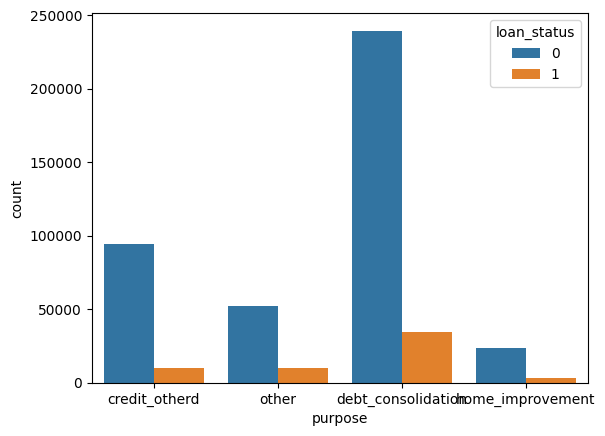

In [36]:
# count purpose by loan status

fig = sns.countplot(data=dataframe, x='purpose', hue='loan_status')

plt.show()


- There are several categorical columns that contain information about dates, so a transformation will be carried out into a date format to find out more information

In [37]:
# issue_d, earliest_cr_line, last_credit_pull_d, last_pymnt_d

dataframe['issue_d'] = pd.to_datetime(dataframe['issue_d'], format='%b-%y')
dataframe['earliest_cr_line'] = pd.to_datetime(dataframe['earliest_cr_line'], format='%b-%y')
dataframe['last_pymnt_d'] = pd.to_datetime(dataframe['last_pymnt_d'], format='%b-%y')
dataframe['last_credit_pull_d'] = pd.to_datetime(dataframe['last_credit_pull_d'], format='%b-%y')


In [38]:
# because date from the dataset is between 2007-2014 let's set one period time 2 year after this dataset to calculate month since last transcation and the others

dataframe['month_since_issue_d'] = abs(round(pd.to_numeric((pd.to_datetime('2016-12-01') - dataframe['issue_d']) / np.timedelta64(1, 'M'))))
dataframe['month_sicne_earliest_cr_line'] = abs(round(pd.to_numeric((pd.to_datetime('2016-12-01') - dataframe['earliest_cr_line']) / np.timedelta64(1, 'M'))))
dataframe['month_since_last_pymnt_d'] = abs(round(pd.to_numeric((pd.to_datetime('2016-12-01') - dataframe['last_pymnt_d']) / np.timedelta64(1, 'M'))))
dataframe['month_since_last_credit_pull_d'] = abs(round(pd.to_numeric((pd.to_datetime('2016-12-01') - dataframe['last_credit_pull_d']) / np.timedelta64(1, 'M'))))


In [39]:
# drop datetime columns

dataframe.drop(labels=['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d'], axis=1, inplace=True)

In [40]:
dataframe['month_since_issue_d'].describe()

count    466285.000000
mean         39.255187
std          14.340154
min          24.000000
25%          29.000000
50%          35.000000
75%          45.000000
max         114.000000
Name: month_since_issue_d, dtype: float64

In [41]:
dataframe['month_sicne_earliest_cr_line'].describe()

count    466256.000000
mean        230.405031
std          86.562367
min          61.000000
25%         172.000000
50%         214.000000
75%         273.000000
max         624.000000
Name: month_sicne_earliest_cr_line, dtype: float64

In [42]:
dataframe['month_since_last_pymnt_d'].describe()

count    465909.000000
mean         19.294369
std          12.809898
min          11.000000
25%          11.000000
50%          12.000000
75%          23.000000
max         108.000000
Name: month_since_last_pymnt_d, dtype: float64

In [43]:
dataframe['month_since_last_credit_pull_d'].describe()

count    466243.000000
mean         15.045588
std           9.636423
min          11.000000
25%          11.000000
50%          11.000000
75%          13.000000
max         115.000000
Name: month_since_last_credit_pull_d, dtype: float64

In [44]:
# check dataframe to explore data again

explore_data(dataframe)

,Data Type,Total Null,Null_pct,Data Range,Unique Values
loan_amnt,int64,0,0.00,3.450000e+04,-
funded_amnt,int64,0,0.00,3.450000e+04,-
funded_amnt_inv,float64,0,0.00,3.500000e+04,-
term,int32,0,0.00,2.400000e+01,-
int_rate,float64,0,0.00,2.064000e+01,-
installment,float64,0,0.00,1.394320e+03,-
grade,object,0,0.00,0.000000e+00,"[B, C, A, E, F, D, G]"
emp_length,float64,21008,4.51,1.000000e+01,-
home_ownership,object,0,0.00,0.000000e+00,"[RENT, OWN, MORTGAGE, OTHER]"
annual_inc,float64,4,0.00,7.498104e+06,-


In [45]:
dataframe.drop(labels='policy_code', axis=1, inplace=True)

In [46]:
# correlation matrix

corr_matrix = dataframe.select_dtypes(exclude='O').corr()

corr_matrix

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,month_since_issue_d,month_sicne_earliest_cr_line,month_since_last_pymnt_d,month_since_last_credit_pull_d
loan_amnt,1.000000,0.998548,0.994347,0.412870,0.167183,0.949666,0.120165,0.370893,0.008584,0.057319,0.006841,-0.020328,0.204182,-0.081137,0.331423,0.117756,0.235262,0.518700,0.518660,0.743841,0.743580,0.612777,0.715876,0.043650,0.110691,0.077336,0.304243,-0.008067,0.006283,-0.002859,0.332686,0.290208,-0.129708,0.175332,-0.132307,-0.087215
funded_amnt,0.998548,1.000000,0.996125,0.410862,0.167921,0.951787,0.120711,0.370311,0.007660,0.058673,0.007386,-0.020970,0.204983,-0.080593,0.331039,0.118885,0.235135,0.521451,0.521412,0.743363,0.743441,0.612318,0.715664,0.043350,0.110338,0.077190,0.304178,-0.007822,0.006472,-0.002859,0.332683,0.290206,-0.137281,0.174327,-0.137986,-0.091546
funded_amnt_inv,0.994347,0.996125,1.000000,0.412005,0.169353,0.947387,0.123738,0.367806,0.000816,0.062606,0.008143,-0.027580,0.205807,-0.078894,0.327436,0.120774,0.235456,0.525143,0.525115,0.738037,0.745460,0.607027,0.713460,0.038985,0.107944,0.073781,0.303105,-0.007175,0.006801,-0.002858,0.332677,0.290185,-0.165802,0.171893,-0.166856,-0.113529
term,0.412870,0.410862,0.412005,1.000000,0.443395,0.159631,0.080978,0.069949,0.061380,0.091912,0.004135,0.009975,0.077714,-0.022790,0.092577,0.084145,0.101324,0.434307,0.434273,0.174923,0.177328,0.009798,0.534333,0.011915,0.090019,0.055900,0.111597,0.000357,0.007724,-0.001775,0.119444,0.061435,-0.087281,0.055057,-0.107479,-0.064057
int_rate,0.167183,0.167921,0.169353,0.443395,1.000000,0.148790,0.030449,-0.046072,0.177551,0.159657,0.079190,0.205641,0.012307,0.066695,-0.004589,0.323365,-0.033012,0.137427,0.137451,0.127035,0.129166,-0.032130,0.485154,0.057875,0.127893,0.082198,0.075609,0.020306,0.030338,0.000863,-0.097316,-0.146838,-0.072497,-0.090903,-0.046407,-0.050704
installment,0.949666,0.951787,0.947387,0.159631,0.148790,1.000000,0.104662,0.368145,0.011620,0.049919,0.017001,0.002247,0.196839,-0.070093,0.320239,0.136852,0.215906,0.408838,0.408811,0.764360,0.763895,0.663399,0.641948,0.052341,0.105666,0.075344,0.299867,-0.006055,0.008923,-0.002359,0.300639,0.270074,-0.117993,0.156135,-0.112402,-0.079241
emp_length,0.120165,0.120711,0.123738,0.080978,0.030449,0.104662,1.000000,0.073876,-0.023472,0.049942,0.030338,-0.016409,0.042534,0.039361,0.091619,0.044498,0.114056,0.087146,0.087147,0.079715,0.083409,0.058486,0.097812,-0.011843,0.006991,0.004765,0.037878,-0.000251,0.009875,-0.001617,0.096538,0.068100,-0.093568,0.225956,-0.095342,-0.079531
annual_inc,0.370893,0.370311,0.367806,0.069949,-0.046072,0.368145,0.073876,1.000000,-0.047497,-0.188548,0.058896,0.056675,0.157784,-0.015439,0.332316,0.037582,0.224690,0.168316,0.168316,0.299784,0.298728,0.275823,0.212951,0.020273,0.016954,0.013680,0.142155,-0.000445,0.017133,0.001895,0.486086,0.291955,-0.034951,0.170328,-0.027744,-0.019879
loan_status,0.008584,0.007660,0.000816,0.061380,0.177551,0.011620,-0.023472,-0.047497,1.000000,0.046131,0.005534,0.108232,-0.005654,-0.008669,-0.011295,0.052280,-0.023198,-0.137382,-0.137369,-0.190196,-0.194865,-0.250656,-0.015451,0.163119,0.412815,0.279995,-0.175125,-0.004206,-0.000693,-0.001095,-0.050701,-0.039476,0.118635,-0.034374,0.258987,0.155178
dti,0.057319,0.058673,0.062606,0.091912,0.159657,0.049919,0.049942,-0.188548,0.046131,1.000000,-0.003694,-0.012541,0.303914,-0.046192,0.143380,0.200412,0.228221,0.119984,0.119972,-0.026007,-0.021788,-0.063895,0.089582,-0.005747,0.021462,0.018084,-0.043068,0.000308,0.009491,-0.003560,-0.018384,0.060972,-0.169451,0.027071,-0.152501,-0.134120


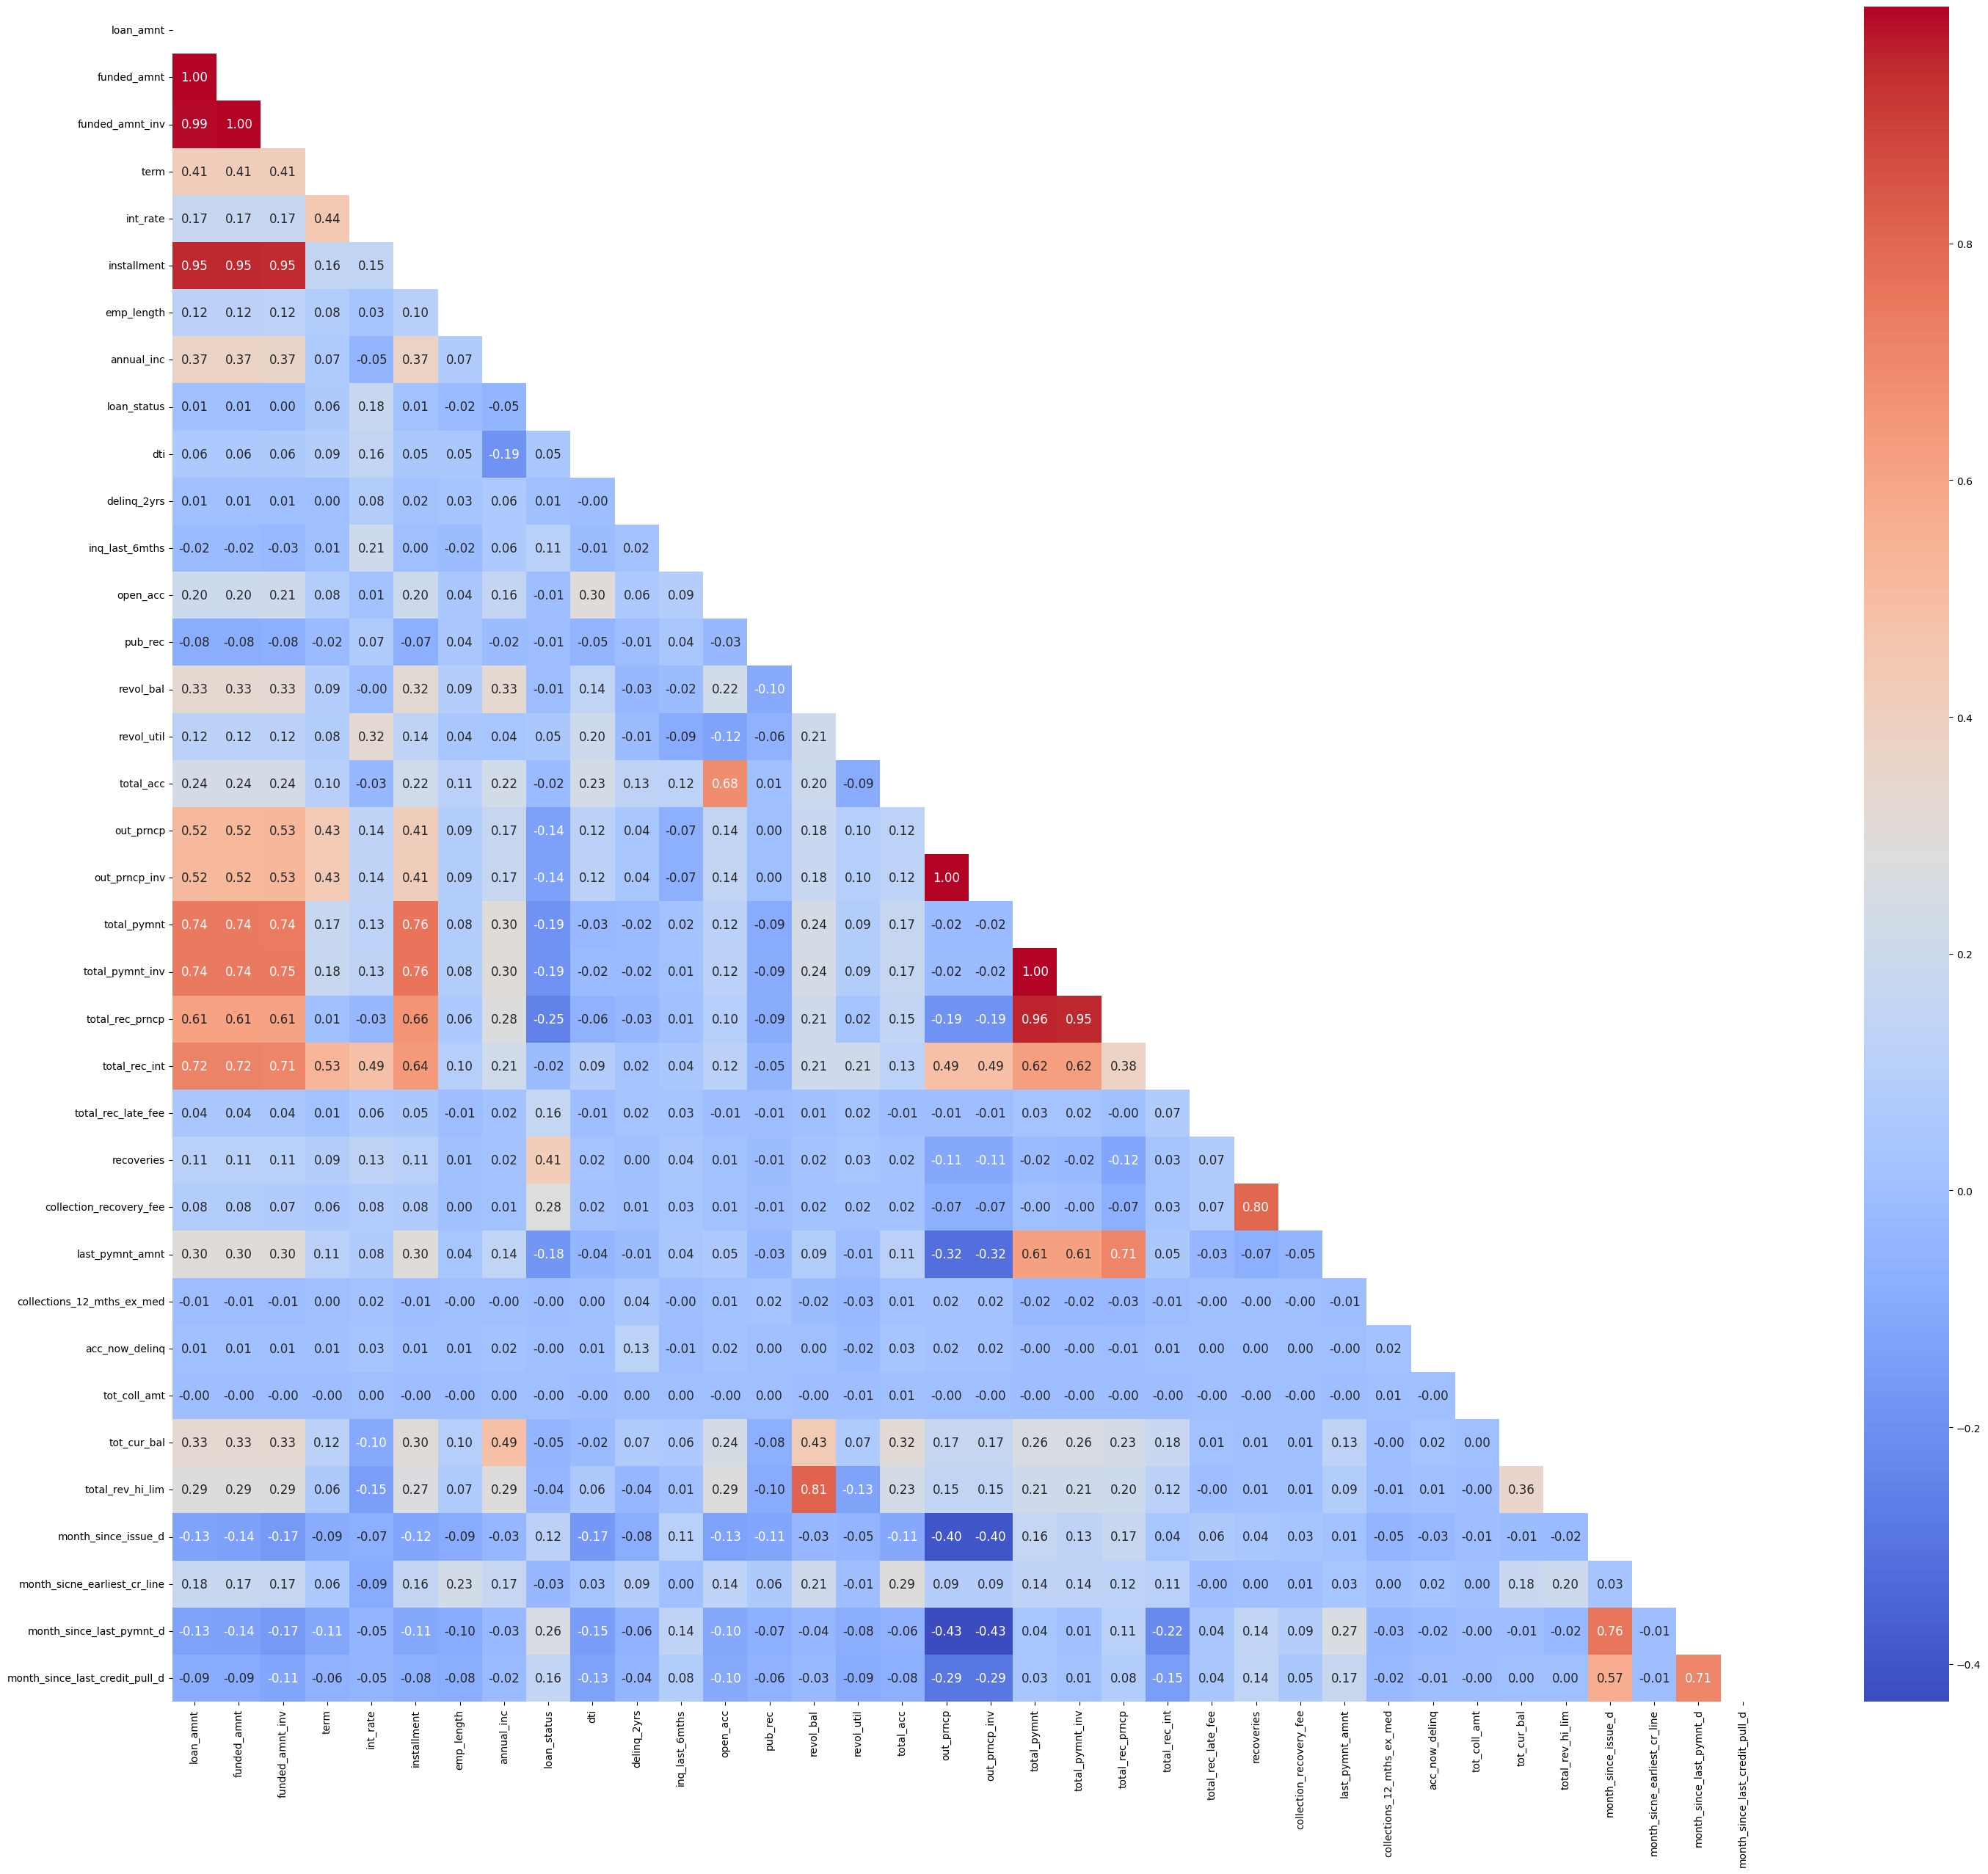

In [47]:
plt.figure(figsize=(35, 30))

fig = sns.heatmap(data=corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', mask=np.triu(np.ones_like(corr_matrix, dtype=bool)), annot_kws={'size':12})

plt.show()

- From the correlation matrix above, when there is a high correlation between two or more columns, we need to consider overcoming multicollinearity. One approach that can be used is to select one of the column pairs that have a high correlation and eliminate the other columns. This approach aims to avoid the negative effects of multicollinearity which can affect the interpretation of model results and produce unstable estimates

In [48]:
corr_matrix = abs(dataframe.corr())
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
drop_numeric = [column for column in upper.columns if any(upper[column] > 0.5)]
drop_numeric, len(drop_numeric)

C:\Users\09021\AppData\Local\Temp\ipykernel_4488\3302453429.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = abs(dataframe.corr())
C:\Users\09021\AppData\Local\Temp\ipykernel_4488\3302453429.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


(['funded_amnt',
  'funded_amnt_inv',
  'installment',
  'total_acc',
  'out_prncp',
  'out_prncp_inv',
  'total_pymnt',
  'total_pymnt_inv',
  'total_rec_prncp',
  'total_rec_int',
  'collection_recovery_fee',
  'last_pymnt_amnt',
  'total_rev_hi_lim',
  'month_since_last_pymnt_d',
  'month_since_last_credit_pull_d'],
 15)

In [49]:
dataframe.drop(labels=drop_numeric, axis=1, inplace=True)

In [50]:
numeric_col = dataframe.select_dtypes(exclude='O').columns
categoric_col = dataframe.select_dtypes(include='O').columns

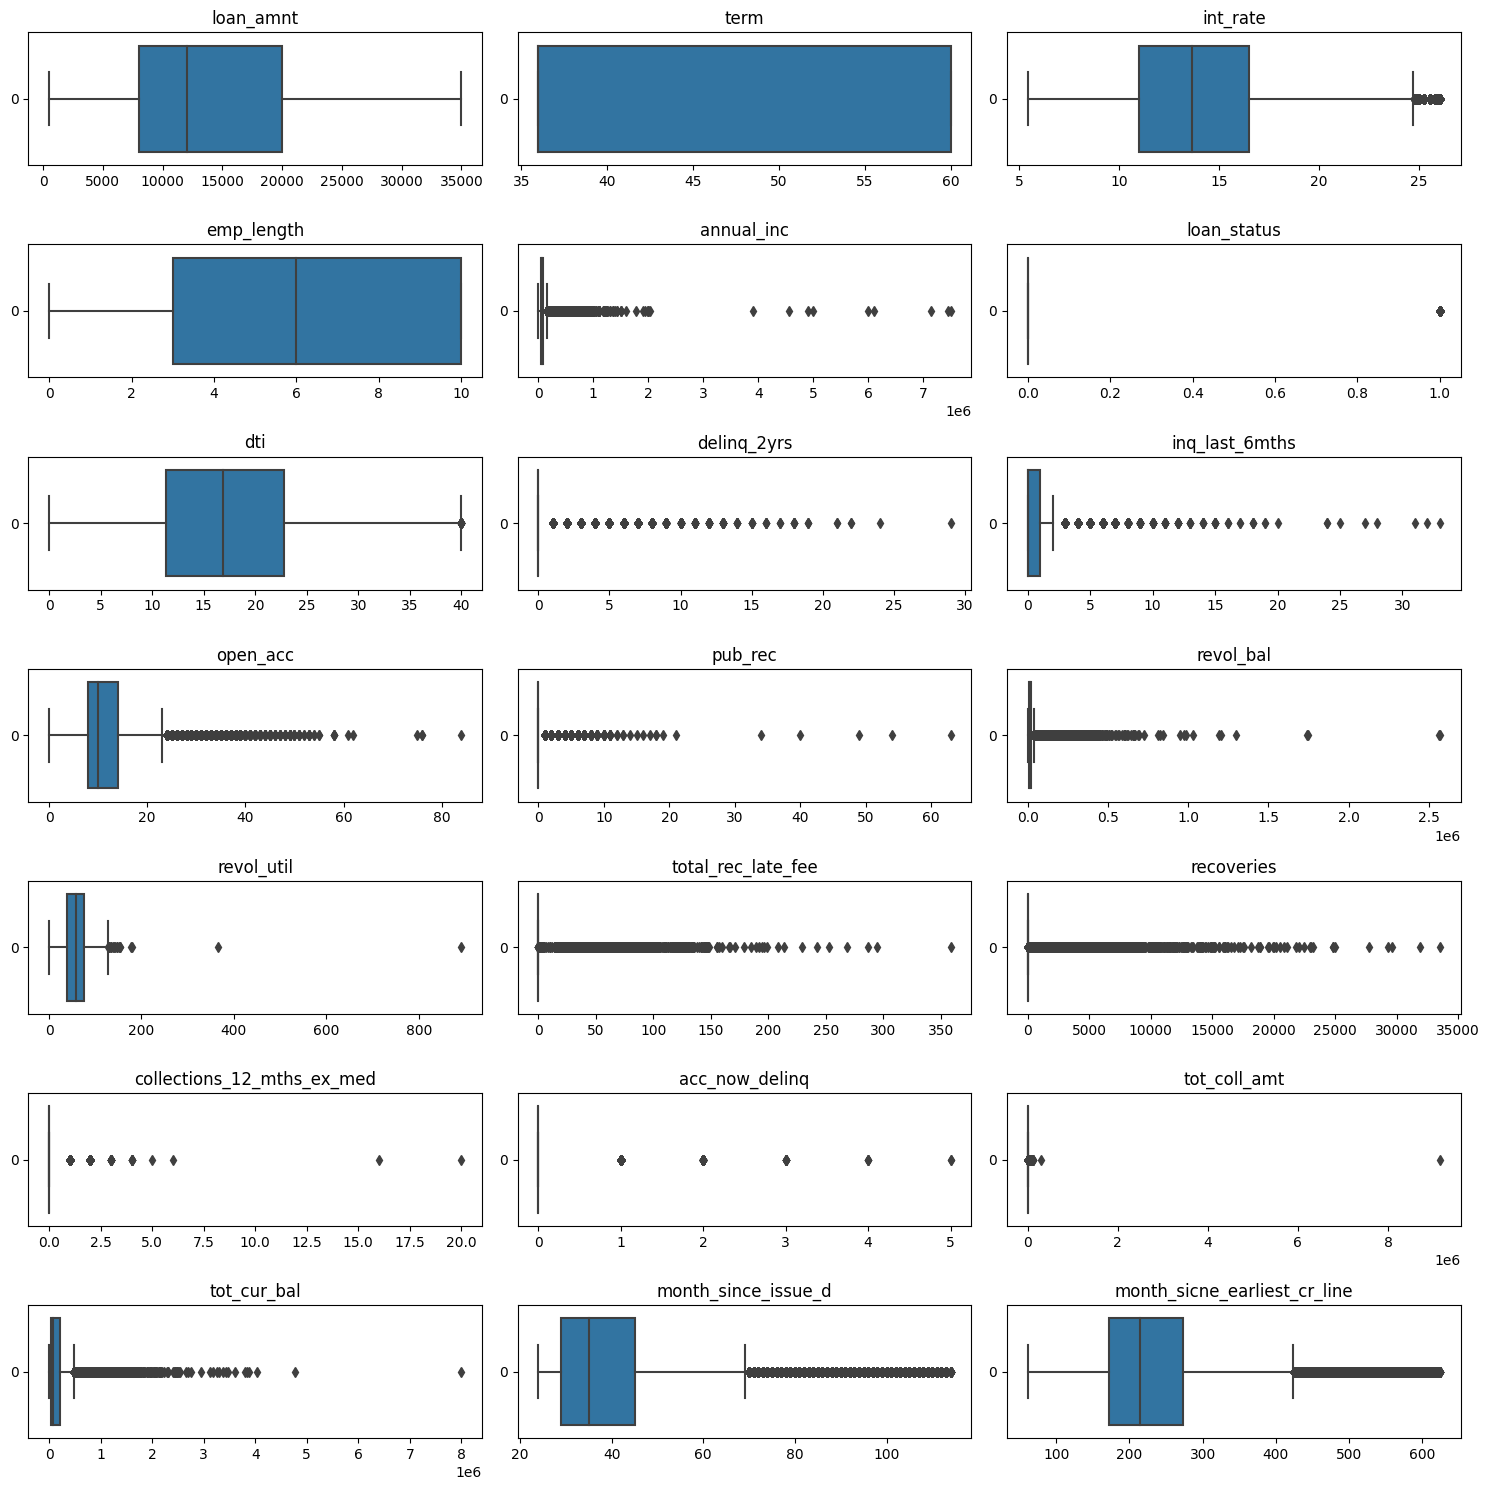

In [51]:
plt.figure(figsize=(15, 15))

i = 1

for column in numeric_col:
    plt.subplot(7, 3, i)
    sns.boxplot(data=dataframe[column], orient='hor')
    plt.title(column, fontdict={'fontsize':12})
    plt.tight_layout()
    i+=1

- In the boxplot diagram above, there are several columns that exhibit outlier values that deviate significantly from the actual values, as indicated by the distance between the upper limit value of the boxplot and the outlier points.

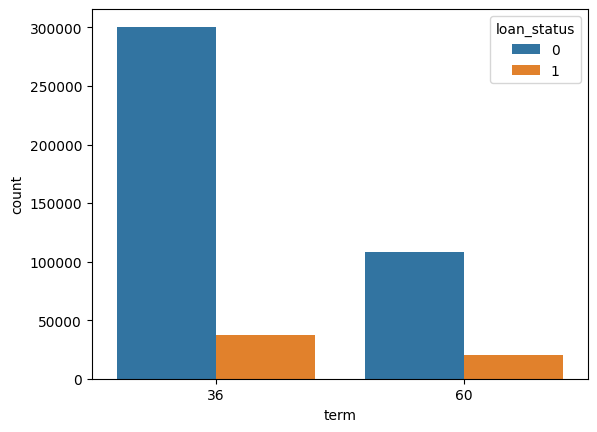

In [52]:
# plot term columns if it's on categorical data type 

sns.countplot(data=dataframe, x=dataframe['term'].astype(str), hue='loan_status')

plt.show()

- Data numerical still has so many outlier and unclean

In [53]:
dataframe[numeric_col].skew()

loan_amnt                         0.730980
term                              1.006562
int_rate                          0.334938
emp_length                       -0.236193
annual_inc                       29.568905
loan_status                       2.296729
dti                               0.188283
delinq_2yrs                       5.345748
inq_last_6mths                    2.142143
open_acc                          1.165698
pub_rec                          14.941355
revol_bal                        19.476291
revol_util                       -0.160962
total_rec_late_fee               13.843497
recoveries                       13.149942
collections_12_mths_ex_med       31.220302
acc_now_delinq                   20.798291
tot_coll_amt                    618.273011
tot_cur_bal                       3.047906
month_since_issue_d               1.720369
month_sicne_earliest_cr_line      1.033565
dtype: float64

- From the skewness of the numerical data, most of the data is not normally distributed, therefore it is better to use the median value to imputate the null value

In [54]:
# impute null values from numerical data with medians

for col in numeric_col:
    median = dataframe[col].median()
    dataframe[col].fillna(median, inplace=True)


- In this case, we will attempt to create a machine learning model using data that contains outlier values that have a wide range compared to the actual data.
- Next, we will create a machine learning model using data where the outlier values have been fixed to a specific value.

In [55]:
# remove loan status from list numeric column

numeric_col = list(numeric_col)
numeric_col.remove('loan_status')

# Machine Learning Model (1)

In [56]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import recall_score, precision_score, classification_report, confusion_matrix

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier


In [57]:
X = dataframe.drop(labels='loan_status', axis=1)
y = dataframe['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=0.2)

In [58]:
imbalance_ = RandomOverSampler(random_state=42)

preprocessing = ColumnTransformer([
    ('numerical columns', MinMaxScaler(), numeric_col),
    ('categoric_col', OneHotEncoder(), categoric_col)
])

algorithm = [LogisticRegression(random_state=42), DecisionTreeClassifier(random_state=42) ,RandomForestClassifier(random_state=42), \
             GradientBoostingClassifier(random_state=42), KNeighborsClassifier()]

In [59]:
compare_model = pd.DataFrame(columns=['train accuracy', 'test_accuracy', 'recall', 'precision'])

train_accuracy = []
test_accuracy = []
precision = []
recall = []
index_col = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'KNN']

for algo in algorithm:

    ml_pipeline = Pipeline([
        ('columns transform', preprocessing),
        ('imbalance', imbalance_),
        ('algorithm', algo)
    ])

    ml_model = ml_pipeline.fit(X_train, y_train)
    
    train_accuracy.append(ml_model.score(X_train, y_train))
    test_accuracy.append(ml_model.score(X_test, y_test))
    
    y_pred = ml_model.predict(X_test)

    precision.append(precision_score(y_pred=y_pred, y_true=y_test))
    recall.append(recall_score(y_pred=y_pred, y_true=y_test))

    

c:\Users\09021\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
compare_model['train accuracy'] = train_accuracy
compare_model['test_accuracy'] = test_accuracy
compare_model['precision'] = precision
compare_model['recall'] = recall
compare_model.index = index_col

compare_model

,train accuracy,test_accuracy,recall,precision
Logistic Regression,0.815700,0.815724,0.626134,0.357524
Decision Tree,1.000000,0.877296,0.530967,0.500864
Random Forest,1.000000,0.933699,0.492498,0.939278
Gradient Boosting,0.880352,0.880577,0.603454,0.512103
KNN,0.839886,0.701374,0.411026,0.182572


- Based on the table showing the results of the machine learning algorithm models above, it is evident that several models, such as the decision tree, random forest and KNN models, exhibit overfitting.
- On the other hand, the performance of other models is relatively good. However, it is important to note that the very low recall and precision values may be attributed to an imbalance in the distribution of the target labels in the test data. Therefore, further analysis is required. 

# Machine Learning Model (2)

- In this case, we will apply the logarithmic method to the numerical columns in order to bring the range of outlier values closer to the actual data.

In [61]:
# handle outlier using transformation logaritmic method

for col in numeric_col:

    dataframe[col] = np.log1p(dataframe[col])

In [62]:
dataframe.describe()

,loan_amnt,term,int_rate,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,month_since_issue_d,month_sicne_earliest_cr_line
count,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000
mean,9.376047,3.748517,2.651326,1.744185,11.057293,0.122929,2.783118,0.158552,0.447231,2.419969,0.101040,9.245278,3.902577,0.073868,0.350921,0.006065,0.002684,0.633329,11.215761,3.643650,5.377606
std,0.669811,0.223294,0.306941,0.724440,0.521629,0.328356,0.539435,0.366748,0.511218,0.405674,0.270613,1.176894,0.659849,0.489009,1.531694,0.066901,0.044549,1.889731,1.171826,0.307865,0.366221
min,6.216606,3.610918,1.859418,0.000000,7.548029,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.218876,4.127134
25%,8.987322,3.610918,2.484073,1.386294,10.714440,0.000000,2.514465,0.000000,0.000000,2.197225,0.000000,8.766238,3.693867,0.000000,0.000000,0.000000,0.000000,0.000000,10.422638,3.401197,5.153292
50%,9.392745,3.610918,2.685123,1.945910,11.050906,0.000000,2.883123,0.000000,0.000000,2.397895,0.000000,9.372884,4.070735,0.000000,0.000000,0.000000,0.000000,0.000000,11.308849,3.583519,5.370638
75%,9.903538,4.110874,2.861629,2.397895,11.395875,0.000000,3.168845,0.000000,0.693147,2.708050,0.000000,9.920050,4.326778,0.000000,0.000000,0.000000,0.000000,0.000000,12.127738,3.828641,5.613128
max,10.463132,4.110874,3.298057,2.397895,15.830414,1.000000,3.713328,3.401197,3.526361,4.442651,4.158883,14.759026,6.794922,5.885215,10.419935,3.044522,1.791759,16.029543,15.894962,4.744932,6.437752


In [63]:
X = dataframe.drop(labels='loan_status', axis=1)
y = dataframe['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=0.2)

In [64]:
imbalance_ = RandomOverSampler(random_state=42)

preprocessing = ColumnTransformer([
    ('numerical columns', MinMaxScaler(), numeric_col),
    ('categoric_col', OneHotEncoder(), categoric_col)
])

algorithm = [LogisticRegression(random_state=42), DecisionTreeClassifier(random_state=42) ,RandomForestClassifier(random_state=42), \
             GradientBoostingClassifier(random_state=42), KNeighborsClassifier()]

In [65]:
compare_model = pd.DataFrame(columns=['train accuracy', 'test_accuracy', 'recall', 'precision'])

train_accuracy = []
test_accuracy = []
precision = []
recall = []
index_col = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'KNN']

for algo in algorithm:

    ml_pipeline = Pipeline([
        ('columns transform', preprocessing),
        ('imbalance', imbalance_),
        ('algorithm', algo)
    ])

    ml_model = ml_pipeline.fit(X_train, y_train)
    
    train_accuracy.append(ml_model.score(X_train, y_train))
    test_accuracy.append(ml_model.score(X_test, y_test))
    
    y_pred = ml_model.predict(X_test)

    precision.append(precision_score(y_pred=y_pred, y_true=y_test))
    recall.append(recall_score(y_pred=y_pred, y_true=y_test))
    


c:\Users\09021\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [66]:
compare_model['train accuracy'] = train_accuracy
compare_model['test_accuracy'] = test_accuracy
compare_model['precision'] = precision
compare_model['recall'] = recall
compare_model.index = index_col

compare_model

,train accuracy,test_accuracy,recall,precision
Logistic Regression,0.859981,0.861340,0.606856,0.452311
Decision Tree,1.000000,0.877511,0.531490,0.501688
Random Forest,1.000000,0.933774,0.492498,0.940373
Gradient Boosting,0.880352,0.880577,0.603454,0.512103
KNN,0.888226,0.790343,0.592551,0.313417


- Based on a comparison of machine learning models with outlier value transformation using the logarithmic method, it was observed that certain models, such as logistic regression and KNN, showed a notable improvement in accuracy. However, the KNN model still exhibited overfitting issues. On the other hand, decision tree-based models and other ensemble learning models showed no significant change in accuracy on both the train and test data. From these findings, we can conclude that the presence of outliers, even those that are far from the actual data distribution, does not have a significant impact on the performance of decision tree-based models.

- It should be emphasized that what has just been analyzed is how the very extreme range of outlier data to the distance of the actual data distribution affects the results of the accuracy of the model. However, it should be noted that outlier values ​​can still cause the model to focus too much on outlier values ​​so that it can cause the model to experience overfitting, although in fact some models such as decision tree-based models have the ability to adjust to outlier values, there will still be negative consequences.

- To enhance the model performance, we will apply cross-validation and hyperparameter tuning. This approach will help us optimize the models and improve their overall performance.

In [67]:
# In this case i choose logistic regression model

logreg_pipeline = Pipeline([
    ('columns transform', preprocessing),
    ('imbalance', imbalance_),
    ('algorithm', LogisticRegression(random_state=42))
])

logreg_param = {
    'algorithm__penalty': ['l1', 'l2'],
    'algorithm__C': [0.1, 1, 10],
    'algorithm__solver': ['liblinear', 'saga'],
    'algorithm__max_iter': [100, 150, 200],
    'algorithm__class_weight': [None, 'balanced']
}

grid_search_logreg = GridSearchCV(estimator=logreg_pipeline, param_grid=logreg_param, cv=5, n_jobs=-1, verbose=1)

grid_search_logreg.fit(X_train, y_train)

print('Best parameters :', grid_search_logreg.best_params_)
print('Best Score :', grid_search_logreg.best_score_)

logreg_best_model = grid_search_logreg.best_estimator_
best_model_score = logreg_best_model.score(X_test, y_test)

print('Accuracy : ', best_model_score)

y_pred = logreg_best_model.predict(X_test)
result_report = classification_report(y_true=y_test, y_pred=y_pred)

print(result_report)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters : {'algorithm__C': 0.1, 'algorithm__class_weight': None, 'algorithm__max_iter': 100, 'algorithm__penalty': 'l1', 'algorithm__solver': 'saga'}
Best Score : 0.8612945906712579
Accuracy :  0.8618441511093001
              precision    recall  f1-score   support

           0       0.94      0.90      0.92     81793
           1       0.45      0.61      0.52     11464

    accuracy                           0.86     93257
   macro avg       0.70      0.75      0.72     93257
weighted avg       0.88      0.86      0.87     93257



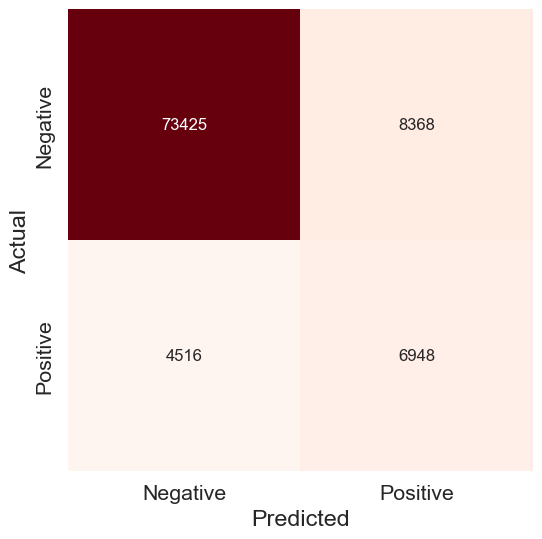

In [68]:
conf_matrix = confusion_matrix(y_test, y_pred)

labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# confusion matrix

plt.figure(figsize=(6, 6))
sns.set(font_scale=1.4) 
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 12}, cmap='Reds', cbar=False, fmt='g')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Negative', 'Positive'])
plt.yticks([0.5, 1.5], ['Negative', 'Positive'])

plt.show()

- Based on the results of the logistic regression model with hyperparameter tuning and cross-validation, it can be observed that there were no significant differences compared to the previous training results. This suggests that the model may not be sensitive to changes in hyperparameters. The obtained accuracy, recall and precision scores, both above 70%, indicate that the model performs well for credit risk prediction. However, it is important to conduct further evaluations, such as calculating the ROC AUC score, to assess the model's performance in classifying "good" and "bad" categories accurately.